# 카테고리 분포

카테고리 분포(Categorical distribution)는 베르누이 분포의 확장판이다. 베르누이 분포는 0 이나 1(또는 -1 이나 1)이 나오는 확률 변수의 분포였다. 카케고리 분포는 1부터 K까지의 $K$개의 정수 값 중 하나가 나오는 확률 변수의 분포이다. 따라서 주사위를 던져 나오는 눈금의 수를 확률 변수라고 한다면 이 확률 변수의 분포는 $K=6$인 카테고리 분포이다.

카테고리 분포의 모수 $\theta$ 는 베르누이 분포와 달리 다음과 같은 제약 조건을 가지는 벡터값이 된다.

$$ \theta = ( \theta_1, \cdots , \theta_K ) $$

$$ \sum_{k=1}^K \theta_k = 1 $$

카테고리 분포는 원래 단일 변수 확률 분포이지만 일반적으로는 0 또는 1 값만 가지는 $K$개 베르누이 분포 벡터를 가지는 다변수 확률 분포로 가정하여 사용한다. 다만 이 경우 다변수 확률 변수의 각 원소 중 하나만 1이 될 수 있다는 제약 조건을 가진다. 

이를 수식으로 나타내면 다음과 같다. 카테고리 분포는 $\text{Cat}(x;\theta)$로 표기한다.

$$ \text{Cat}(x;\theta) = \prod_{k=1}^K \theta_k^{x_k} $$

이 식에서 $x = k $일때 $x_{j=k} = 1$ 이고 $x_{j\neq k} = 0 $ 이다.

카테고리 분포의 기댓값과 분산은 다음과 같다.

* 기댓값
$$\text{E}[x_k] = \theta_k$$

* 분산
$$\text{Var}[x_k] = \theta_k(1-\theta_k)$$

SciPy는 카테고리 분포를 위한 별도의 클래스나 명령어를 제공하지 않는다. 다만 NumPy의 random 서브패키지의 `multinomial` 명령에서 `n` 인수를 1로 설정하고 `pvals`에 모수 벡터 $\theta$를 설정하면 1부터 `len(pvals)`까지의 카테고리 분포를 따르는 데이터 샘플을 생성할 수 있다.

In [1]:
np.random.seed(0)
theta = np.array([1/6]*6)
X = np.random.multinomial(1, theta, size=20)
X

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

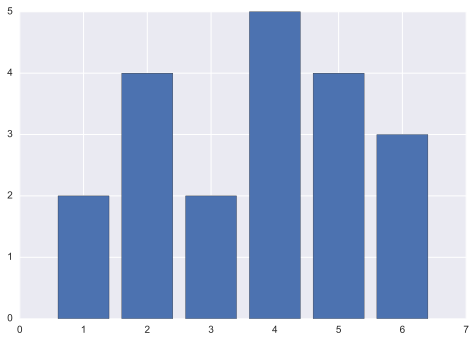

In [2]:
plt.bar(np.arange(1, 7), X.sum(axis=0), align="center")
plt.show()

In [3]:
df = pd.DataFrame({"theoretic": theta, "simulation": X.mean(axis=0)}).stack()
df = df.reset_index()
df.columns = ["value", "type", "ratio"]
df.head()

,value,type,ratio
0,0,simulation,0.100000
1,0,theoretic,0.166667
2,1,simulation,0.200000
3,1,theoretic,0.166667
4,2,simulation,0.100000


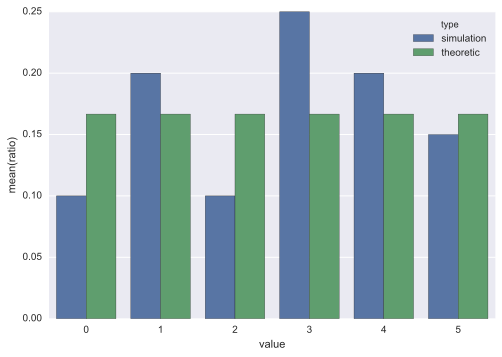

In [4]:
sns.barplot(x="value", y="ratio", hue="type", data=df)
plt.show()

$\theta$를 다른 값으로 실행해보자

In [5]:
np.random.seed(0)
theta = np.array([0, 0, 0.1, 0.2, 0.3, 0.4])
X = np.random.multinomial(1, theta, size=20)
X

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0]])

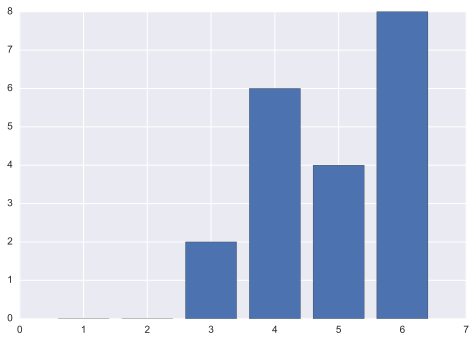

In [6]:
plt.bar(np.arange(1, 7), X.sum(axis=0), align="center")
plt.show()

In [35]:
df = pd.DataFrame({"theoretic": theta, "simulation": X.mean(axis=0)}).stack()
df = df.reset_index()
df.columns = ["value", "type", "ratio"]
df.head()

,value,type,ratio
0,0,simulation,0.0
1,0,theoretic,0.0
2,1,simulation,0.0
3,1,theoretic,0.0
4,2,simulation,0.1


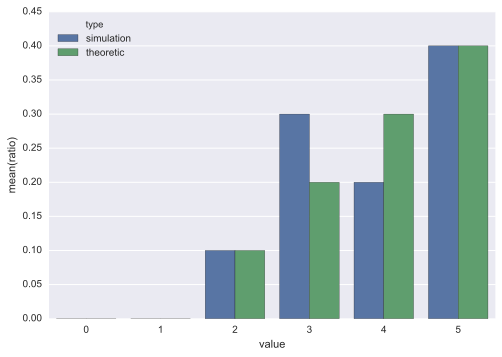

In [36]:
sns.barplot(x="value", y="ratio", hue="type", data=df)
plt.show()